In [1]:
# Import Libraries

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Modeling Libraries

import time
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,cross_val_score,RandomizedSearchCV,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, \
AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor

In [3]:
data=pd.read_csv("/content/drive/MyDrive/CSV/Customer Purchasing Behaviors.csv")
data.head(5)

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [5]:
data.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [6]:
data.region.value_counts()

,count
region,
North,78
South,77
West,77
East,6


In [7]:
encoder = LabelEncoder()
data.region = encoder.fit_transform(data.region)

# 1 == North , 2 == South, 3 == West, 4 == East

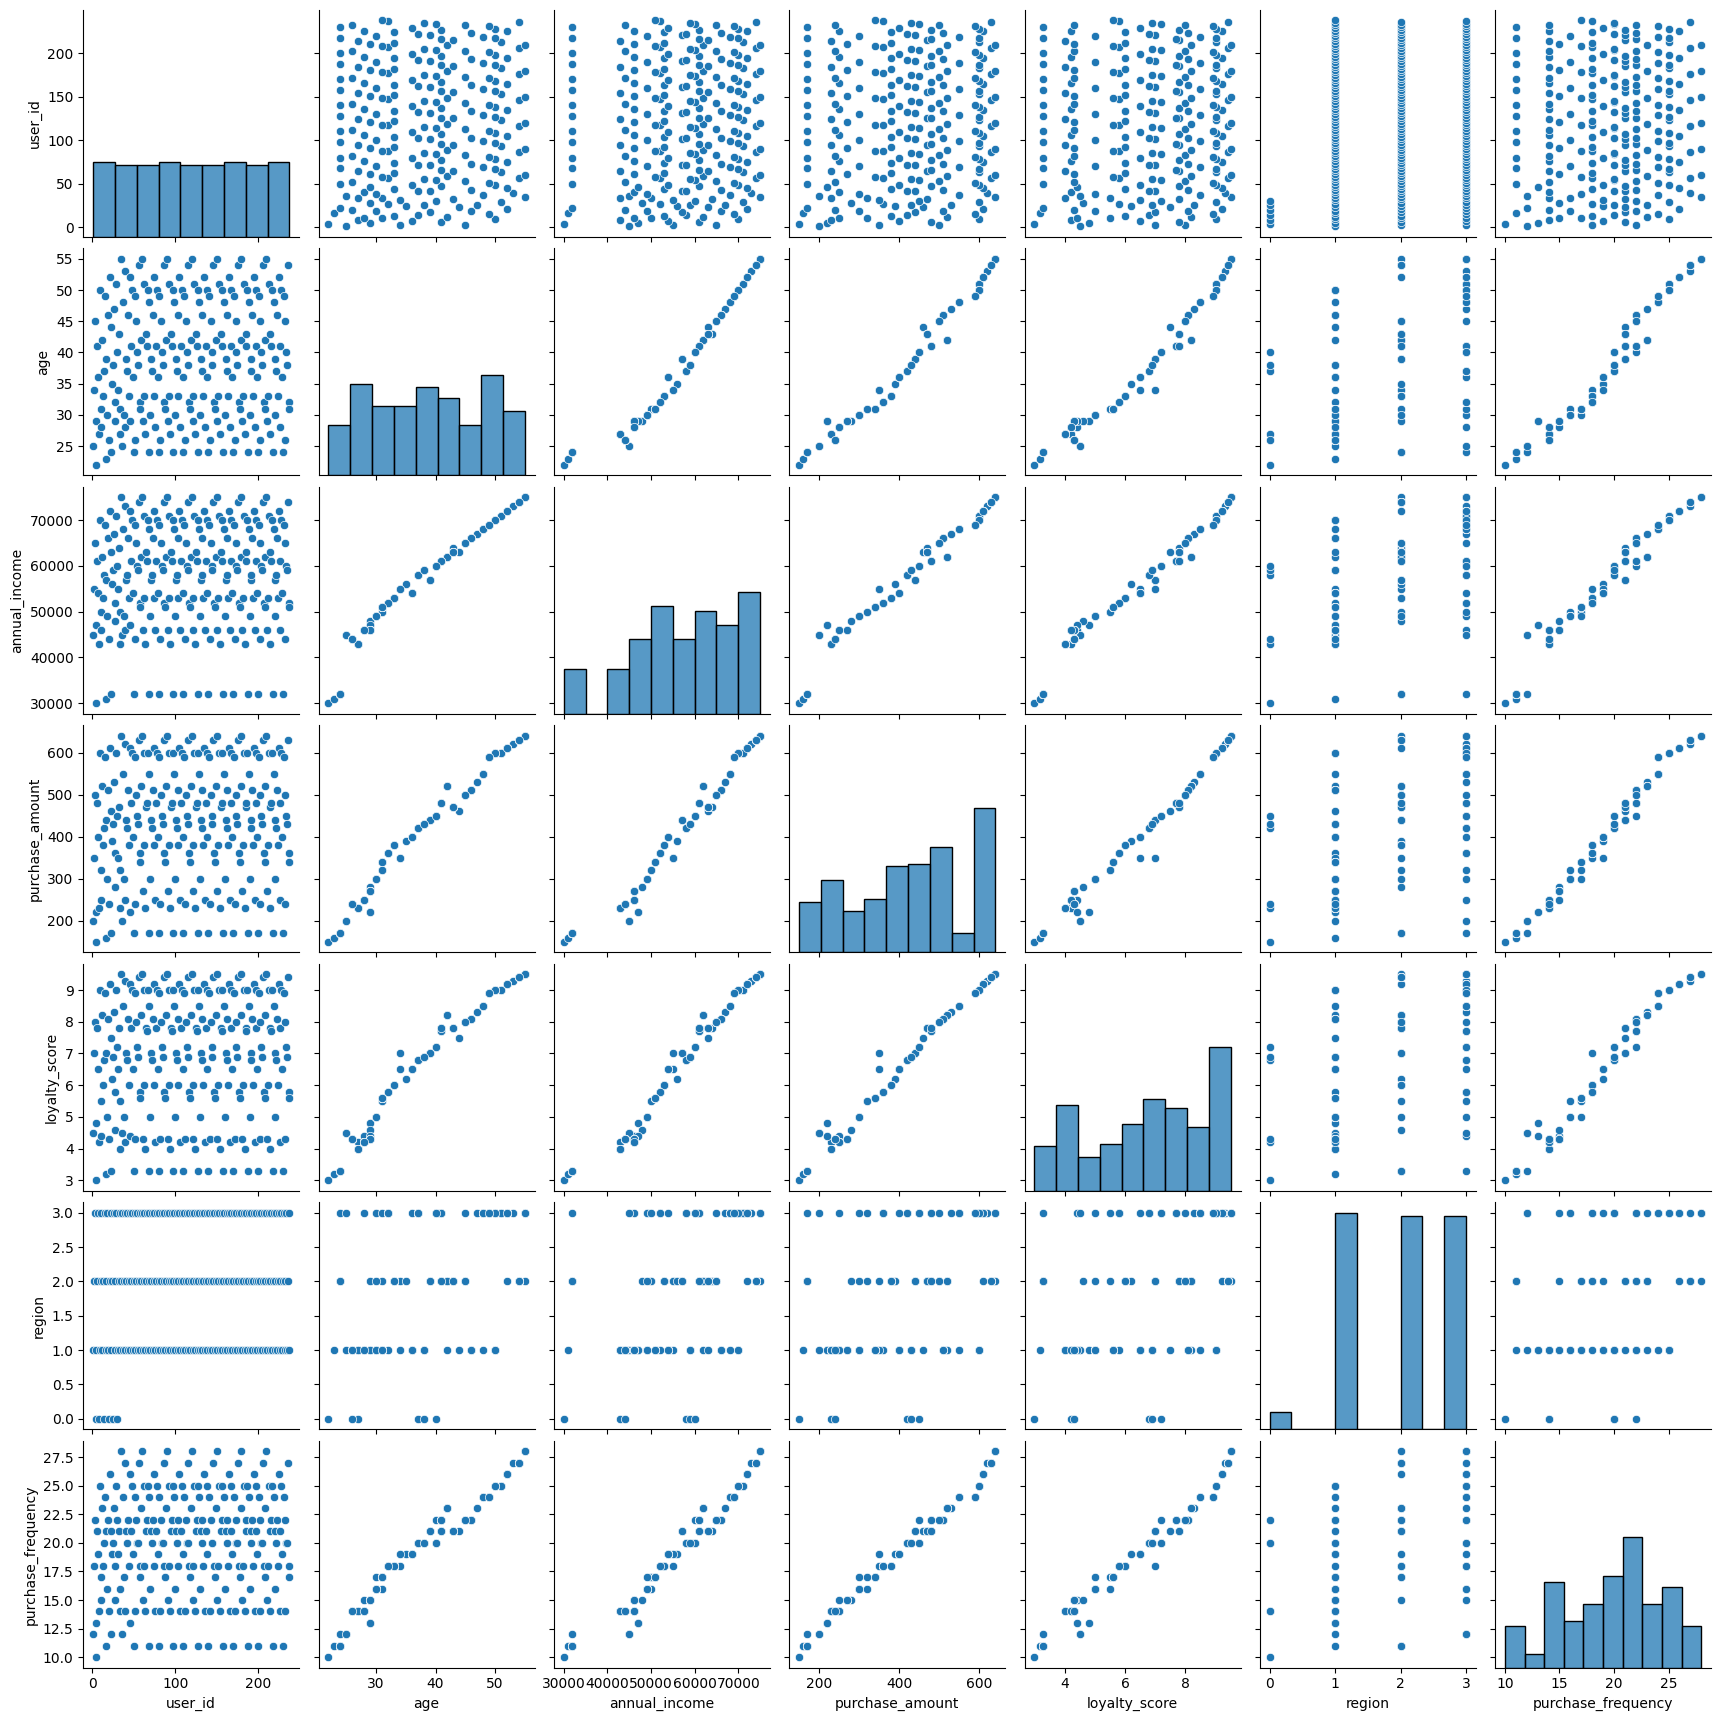

In [8]:
sns.pairplot(data)

In [9]:
scale = StandardScaler()
scale.fit(data)
scaled_data = pd.DataFrame(scale.transform(data) ,columns = data.columns)
scaled_data.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,-1.724789,-1.465632,-1.090306,-1.614441,-1.210582,-1.092272,-1.712679
1,-1.710233,-0.501151,-0.211563,-0.541153,0.108642,0.063109,-0.394950
2,-1.695678,0.677658,0.667180,0.532134,0.636332,1.218490,0.483536
3,-1.681123,-1.787125,-2.408420,-1.972203,-2.002117,-2.247652,-2.151922
4,-1.666568,-1.036974,-0.914557,-1.471336,-1.052275,-1.092272,-1.493057


<Axes: >

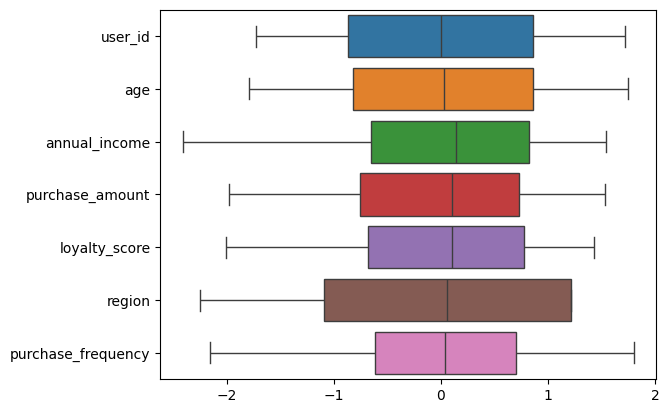

In [10]:
sns.boxplot(scaled_data, orient = 'h')


<Axes: >

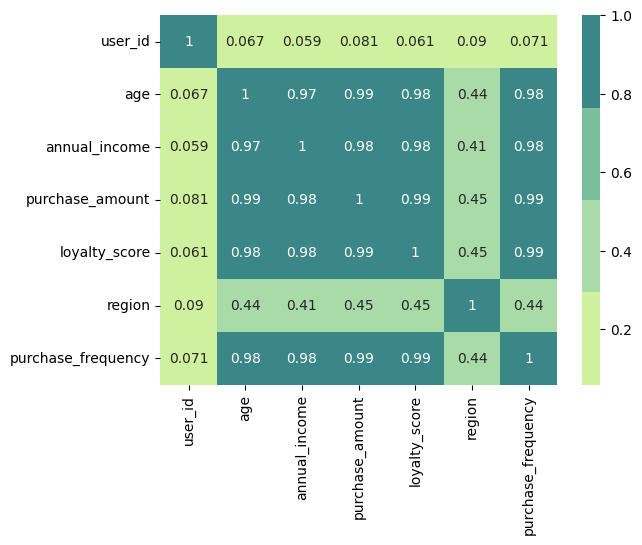

In [11]:
cmap = ListedColormap(['#cff09e','#a8dba8','#79bd9a','#3b8686'])
cor_data = data.corr()
sns.heatmap(cor_data, annot = True, cmap = cmap)